<a href="https://colab.research.google.com/github/Cheryl0905/Datathon/blob/main/Olivia_RSM8432_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Libraries
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as imbalanced_pipeline

In [57]:
df = pd.read_excel('/content/SQL_Tushar.xlsx', sheet_name='Updated_SQLV2')
y = df['Fraud']
X = df.drop(columns=['Fraud','no_attending_physicians'])

In [58]:
X['clinic_size'] = X['clinic_size'].map({'Small': 0, 'Large': 1})

In [59]:
y = y.map({'Yes': 1, 'No': 0})

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Scale the data
scaler = MinMaxScaler()
cols_to_exclude = ['PID', 'AttendingPhysician']
cols_to_scale = [col for col in X_train.columns if col not in cols_to_exclude]
scaled_X_train = X_train[cols_to_scale]
scaled_X_train = pd.DataFrame(scaler.fit_transform(scaled_X_train), columns=scaled_X_train.columns)
scaled_X_train

,total_no_of_claims,total_amount_reimbursed,avg_inpatient_time,no_unique_beneficiaries,no_female_patients,no_male_patients,no_renal_disease,no_alzheimer,no_Heartfailure,no_KidneyDisease,...,no_pregnancy,no_skin,no_musculoskeletal,no_congenital,no_perinatal,no_symptoms,no_injury,no_beneficiaries_did_not_pay_deductible,types_of_patients_handled,clinic_size
0,0.059740,0.045774,0.139286,0.074919,0.079602,0.043243,0.068627,0.074074,0.059406,0.037267,...,0.0,0.166667,0.100,0.0,0.0,0.062500,0.033333,0.333333,0.642857,0.0
1,0.000000,0.000704,0.085714,0.000000,0.004975,0.000000,0.000000,0.005291,0.000000,0.000000,...,0.0,0.000000,0.000,0.0,0.0,0.010417,0.000000,0.000000,0.000000,1.0
2,0.000000,0.002113,0.057143,0.000000,0.004975,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
3,0.005195,0.005164,0.152381,0.006515,0.004975,0.010811,0.009804,0.015873,0.000000,0.006211,...,0.0,0.000000,0.000,0.0,0.0,0.010417,0.000000,0.000000,0.142857,1.0
4,0.000000,0.001643,0.085714,0.000000,0.004975,0.000000,0.009804,0.005291,0.000000,0.000000,...,0.0,0.000000,0.000,0.0,0.0,0.010417,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8330,0.000000,0.003286,0.085714,0.000000,0.004975,0.000000,0.000000,0.000000,0.000000,0.006211,...,0.0,0.000000,0.025,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
8331,0.000000,0.000704,0.257143,0.000000,0.000000,0.005405,0.000000,0.005291,0.009901,0.006211,...,0.0,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
8332,0.000000,0.001878,0.228571,0.000000,0.004975,0.000000,0.000000,0.000000,0.000000,0.006211,...,0.0,0.000000,0.000,0.0,0.0,0.010417,0.000000,0.000000,0.000000,1.0
8333,0.000000,0.000939,0.028571,0.000000,0.000000,0.005405,0.000000,0.000000,0.009901,0.000000,...,0.0,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0


In [62]:
cols_to_scale = [col for col in X_test.columns if col not in cols_to_exclude]
scaled_X_test = X_test[cols_to_scale]
scaled_X_test = pd.DataFrame(scaler.fit_transform(scaled_X_test), columns=scaled_X_test.columns)
scaled_X_test

,total_no_of_claims,total_amount_reimbursed,avg_inpatient_time,no_unique_beneficiaries,no_female_patients,no_male_patients,no_renal_disease,no_alzheimer,no_Heartfailure,no_KidneyDisease,...,no_pregnancy,no_skin,no_musculoskeletal,no_congenital,no_perinatal,no_symptoms,no_injury,no_beneficiaries_did_not_pay_deductible,types_of_patients_handled,clinic_size
0,0.000000,0.008629,0.114286,0.000000,0.009259,0.000000,0.000000,0.010417,0.015152,0.009901,...,0.0,0.0,0.00,0.0,0.0,0.016949,0.000000,0.000,0.000000,1.0
1,0.005155,0.005393,0.057143,0.005435,0.018519,0.000000,0.020408,0.010417,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.016949,0.000000,0.000,0.071429,0.0
2,0.000000,0.003236,0.085714,0.000000,0.009259,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0
3,0.000000,0.002697,0.342857,0.000000,0.000000,0.010989,0.020408,0.000000,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000,0.000000,1.0
4,0.000000,0.004854,0.200000,0.000000,0.000000,0.010989,0.020408,0.000000,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,0.067010,0.090497,0.171429,0.070652,0.074074,0.065934,0.102041,0.083333,0.030303,0.029703,...,0.0,0.0,0.00,0.0,0.0,0.067797,0.263158,0.125,0.357143,0.0
3569,0.000000,0.006472,0.571429,0.000000,0.009259,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.016949,0.000000,0.000,0.000000,0.0
3570,0.005155,0.006472,0.071429,0.005435,0.000000,0.021978,0.040816,0.010417,0.015152,0.009901,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000,0.071429,1.0
3571,0.237113,0.232445,0.125836,0.250000,0.231481,0.241758,0.204082,0.312500,0.242424,0.217822,...,0.0,0.0,0.35,0.0,0.0,0.220339,0.368421,0.000,0.500000,0.0


# Model:

In [63]:
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [64]:
predictions = model.predict(scaled_X_test)
predictions

array([0, 0, 0, ..., 1, 1, 1])

In [65]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.6963336132101875

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      2303
           1       0.61      0.40      0.49      1270

    accuracy                           0.70      3573
   macro avg       0.67      0.63      0.64      3573
weighted avg       0.68      0.70      0.68      3573



In [67]:
print(confusion_matrix(y_test, predictions))

[[1976  327]
 [ 758  512]]


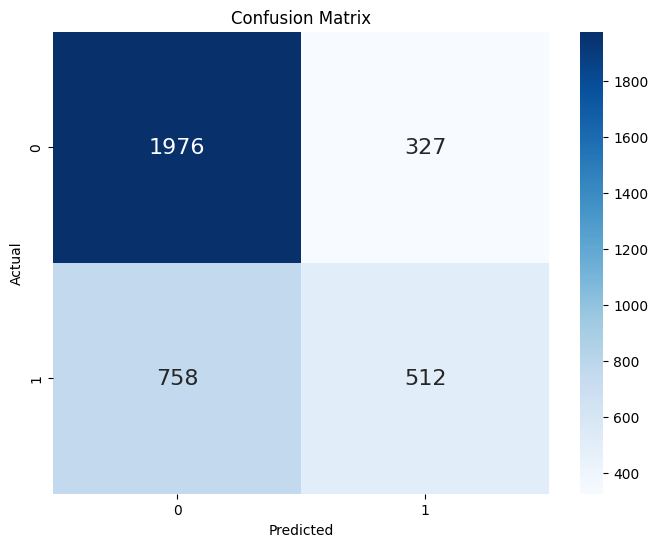

In [69]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [75]:
feature_importance = model.coef_[0]

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': scaled_X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Importance.abs().sort_values(ascending=False).index).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                                    Feature  Importance
39                types_of_patients_handled    3.351060
40                              clinic_size    1.921796
1                   total_amount_reimbursed    1.187139
23                             no_endocrine    0.908013
27                           no_circulatory    0.779105
36                              no_symptoms    0.778349
33                       no_musculoskeletal    0.744337
28                           no_respiratory    0.734754
7                              no_alzheimer    0.723096
31                             no_pregnancy    0.656101
3                   no_unique_beneficiaries    0.617239
2                        avg_inpatient_time    0.616958
11                        no_ObstrPulmonary    0.580973
21                            no_infectious    0.539540
4                        no_female_patients    0.503867
10                                no_Cancer    0.461404
0                        tot

# SMOTE:

In [76]:
over_sampling_smote = SMOTE()
model = LogisticRegression()

In [77]:
pipeline_SMOTE_Log = imbalanced_pipeline([
    ('SMOTE', over_sampling_smote),
     ('classification', model)
    ])

In [79]:
pipeline_SMOTE_Log.fit(scaled_X_train, y_train)

Pipeline(steps=[('SMOTE', SMOTE()), ('classification', LogisticRegression())])

In [81]:
predictions = pipeline_SMOTE_Log.predict(scaled_X_test)
predictions

array([1, 0, 0, ..., 1, 1, 1])

In [82]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.670864819479429

In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69      2303
           1       0.52      0.85      0.65      1270

    accuracy                           0.67      3573
   macro avg       0.70      0.71      0.67      3573
weighted avg       0.75      0.67      0.68      3573



In [84]:
print(confusion_matrix(y_test, predictions))

[[1317  986]
 [ 190 1080]]


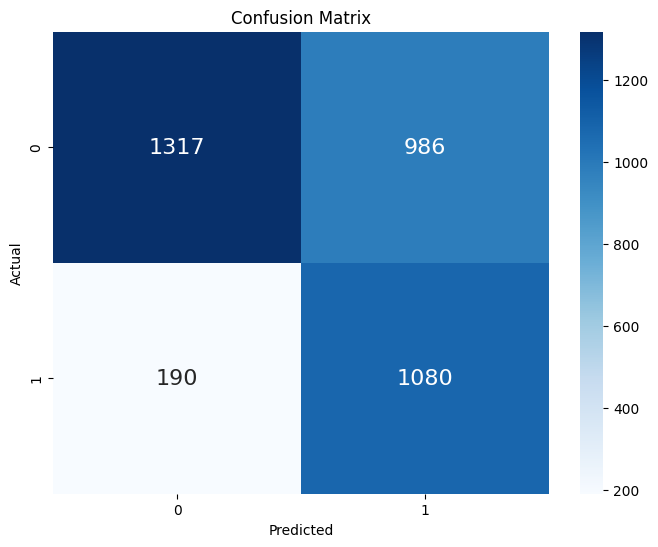

In [85]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()